In [1]:
#colab drive baplantısı
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls
cd cnnComputerVision/

/content/drive/MyDrive/cnnComputerVision


In [35]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

#kaggle dataset download 
!kaggle competitions download -c dogs-vs-cats


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mftnakrsu","key":"2409f48d2c8b29ecb281943d20816ad0"}'}

In [38]:
!unzip train.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  i

In [39]:
import os, shutil


In [42]:
# The directory where we will
# store our smaller dataset
base_dir = 'cats_and_dogs_small'
os.mkdir(base_dir)

In [63]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'train'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [64]:
print('total training cat images:', len(os.listdir(train_cats_dir)))


total training cat images: 1000


In [65]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))


total training dog images: 1000


In [66]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))


total validation cat images: 500


In [67]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))


total validation dog images: 500


In [68]:
print('total test cat images:', len(os.listdir(test_cats_dir)))


total test cat images: 500


In [69]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total test dog images: 500


In [71]:
from keras import layers
from keras.models import Sequential

In [72]:
model=Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [74]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


# Data Preprocess

1)Read the pictures

2)Decode jpeg to rgb pixels

3)convert into float tensors

4)rescale pixels


In [78]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [79]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [81]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


Epoch 1/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6919 - acc: 0.5305 - val_loss: 0.6742 - val_acc: 0.5290
Epoch 2/30
100/100 [==============================] - 12s 115ms/step - loss: 0.6581 - acc: 0.6065 - val_loss: 0.6496 - val_acc: 0.6170
Epoch 3/30
100/100 [==============================] - 11s 112ms/step - loss: 0.5979 - acc: 0.6825 - val_loss: 0.6235 - val_acc: 0.6480
Epoch 4/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5664 - acc: 0.7110 - val_loss: 0.5910 - val_acc: 0.6740
Epoch 5/30
100/100 [==============================] - 11s 115ms/step - loss: 0.5397 - acc: 0.7370 - val_loss: 0.5932 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5041 - acc: 0.7520 - val_loss: 0.5863 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4806 - acc: 0.7645 - val_loss: 0.5879 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 1

In [82]:
model.save('cats_and_dogs_1.h5')

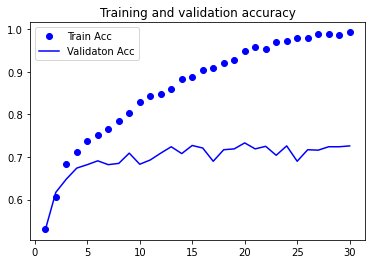

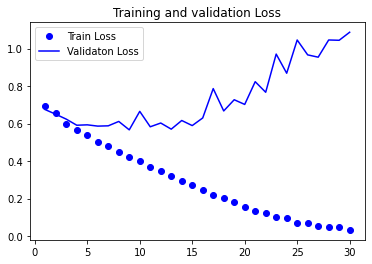

In [85]:
import matplotlib.pyplot as plt

acc=model.history.history['acc']
val_acc=model.history.history['val_acc']

loss=model.history.history['loss']
val_loss=model.history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Train Acc')
plt.plot(epochs,val_acc,'b',label='Validaton Acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Train Loss')
plt.plot(epochs,val_loss,'b',label='Validaton Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()